In [97]:
from typing import List, Optional

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st

from sklearn.metrics import roc_auc_score, roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_val_score
from sklearn.utils.validation import check_is_fitted
import xgboost as xgb
%matplotlib inline

In [2]:
train = pd.read_csv("assignment_train.csv")
test = pd.read_csv("assignment_test.csv")

print("train.shape = {} rows, {} cols".format(*train.shape))
print("test.shape = {} rows, {} cols".format(*test.shape))

train.shape = 50001 rows, 394 cols
test.shape = 75000 rows, 394 cols


In [3]:
train.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.000100e+04,50001.000000,5.000100e+04,50001.000000,50001.000000,49304.000000,49998.000000,49766.000000,47410.000000,47410.000000,...,12268.000000,12268.000000,12268.000000,12268.000000,12268.000000,12268.000000,12268.000000,12268.000000,12268.000000,12268.000000
mean,3.012000e+06,0.027139,6.378101e+05,128.129726,9912.598368,366.635547,152.803612,200.704276,291.813162,85.590593,...,0.110450,38.942391,63.051814,45.816241,4.252527,14.926426,7.991718,15.742603,21.362671,16.464481
std,1.443419e+04,0.162491,3.229461e+05,213.078011,4904.597980,159.057800,10.482210,40.299048,104.991697,6.687334,...,0.469788,190.465893,446.405097,210.319262,46.694625,105.561868,60.584452,91.083819,131.071046,92.726771
min,2.987000e+06,0.000000,8.640000e+04,0.292000,1001.000000,100.000000,100.000000,100.000000,100.000000,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.999500e+06,0.000000,3.523050e+05,42.000000,6019.000000,208.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.012000e+06,0.000000,6.537500e+05,68.500000,9705.000000,369.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.024500e+06,0.000000,9.321340e+05,120.000000,14265.000000,514.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.037000e+06,1.000000,1.189349e+06,4829.950000,18393.000000,600.000000,229.000000,237.000000,540.000000,102.000000,...,7.000000,6300.000000,32250.000000,6300.000000,1000.000000,2700.000000,1300.000000,1700.000000,3000.000000,1700.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 150.3+ MB


In [12]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
test.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,7.500000e+04,75000.000000,7.500000e+04,75000.000000,75000.000000,74005.000000,75000.000000,74589.000000,64490.000000,64490.000000,...,24387.000000,24387.000000,24387.000000,24387.000000,24387.000000,24387.000000,24387.000000,24387.000000,24387.000000,24387.000000
mean,3.099500e+06,0.025973,2.279529e+06,128.028591,9831.878667,371.307695,154.075347,199.892169,291.440564,86.974725,...,0.159060,105.575307,131.765079,119.110755,11.564440,21.261696,16.245663,36.206626,42.026613,38.234797
std,2.165078e+04,0.159057,4.140176e+05,193.315818,4908.219772,159.001973,12.295349,40.927724,100.732324,1.704298,...,0.764107,730.361658,854.615865,768.778641,102.634158,134.484367,119.260027,339.409687,378.479522,345.706813
min,3.062000e+06,0.000000,1.643492e+06,1.000000,1006.000000,100.000000,100.000000,100.000000,110.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.080750e+06,0.000000,1.950398e+06,45.000000,6019.000000,220.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.099500e+06,0.000000,2.187586e+06,75.000000,9633.000000,390.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.118249e+06,0.000000,2.595982e+06,131.000000,14223.000000,514.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.136999e+06,1.000000,3.093408e+06,5094.950000,18396.000000,600.000000,231.000000,237.000000,536.000000,102.000000,...,15.000000,20750.000000,22500.000000,21250.000000,3100.000000,3350.000000,3250.000000,8250.000000,8250.000000,8250.000000


In [10]:
train["isFraud"].value_counts()

0    48644
1     1357
Name: isFraud, dtype: int64

In [11]:
test["isFraud"].value_counts()

0    73052
1     1948
Name: isFraud, dtype: int64

### Задание 1: Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.

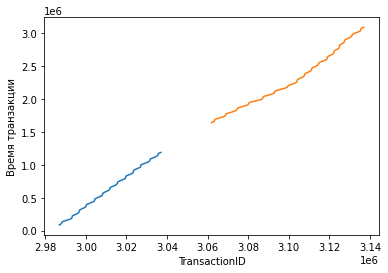

In [26]:
plt.plot(train["TransactionID"], train["TransactionDT"])
plt.plot(test["TransactionID"], test["TransactionDT"])
plt.xlabel("TransactionID")
plt.ylabel("Время транзакции")
plt.show()

Вывод: т.к.данные зависят от времени лучше вего подойдет TimeSeriesSplit валидация.

### Задание 2: построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.

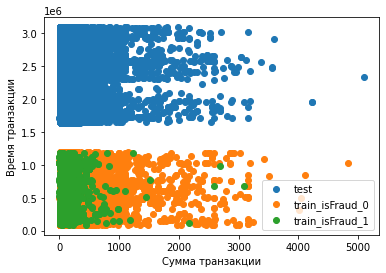

In [25]:
plt.scatter(test["TransactionAmt"], test["TransactionDT"],label="test")
plt.scatter(train[train["isFraud"]==0]["TransactionAmt"], train[train["isFraud"]==0]["TransactionDT"], label="train_isFraud_0")
plt.scatter(train[train["isFraud"]==1]["TransactionAmt"], train[train["isFraud"]==1]["TransactionDT"], label="train_isFraud_1")
plt.xlabel("Сумма транзакции")
plt.ylabel("Время транзакции")
plt.legend(loc="lower right")
plt.show()

Вывод: мошеннические транзакции в основном на сумму менее 1000, все, что больше 1000 похоже на выбросы.

### Задание 3: построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.

<AxesSubplot:title={'center':'Log Normal'}, xlabel='TransactionAmt'>

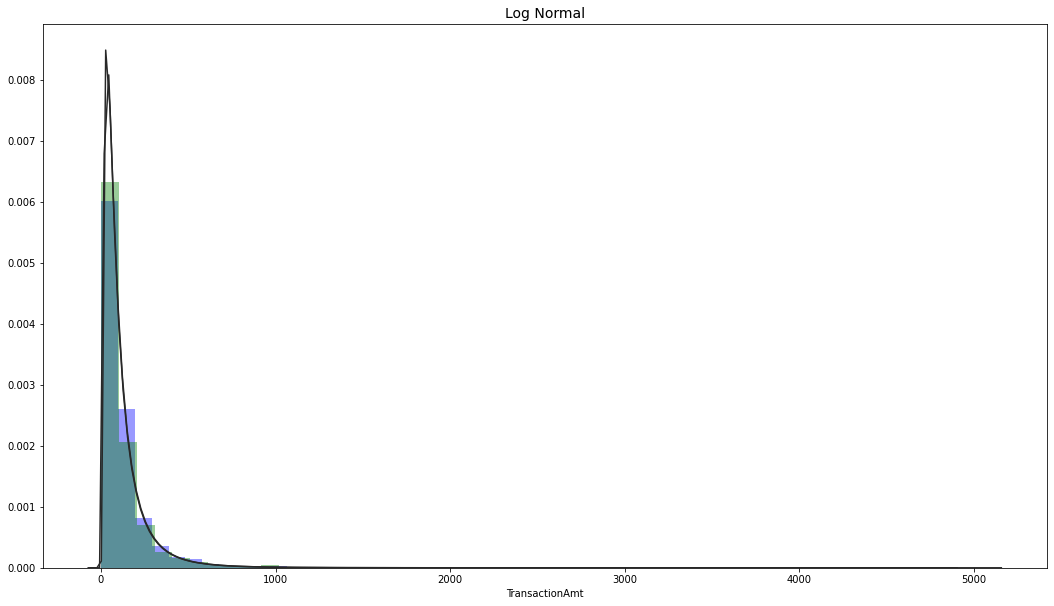

In [86]:
fig, axes = plt.subplots(figsize=(18, 10))
axes.set_title("Log Normal", fontsize=14)
sns.distplot(train["TransactionAmt"], kde=False, color="blue", fit=st.lognorm, ax=axes)
sns.distplot(test["TransactionAmt"], kde=False, color="green", fit=st.lognorm, ax=axes)

Выводы: распределение признака TransactionAmt на трейне и на тесте не похоже на нормальное, но похоже между собой.

### Задание 4: построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.

In [32]:
categorical_features = train.select_dtypes(include=[np.object])
print(f"Categorical Feature Count {categorical_features.shape[1]}")
categorical_features.head(n=2)

Categorical Feature Count 14


,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN


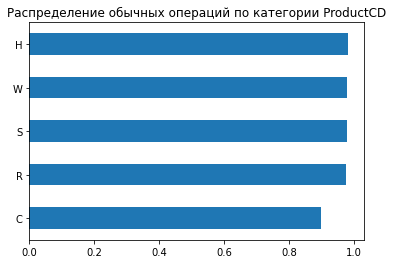

In [61]:
ProductCD_0 = (train[train["isFraud"]==0]["ProductCD"].value_counts()/train["ProductCD"].value_counts()).sort_values()
ProductCD_0 = ProductCD_0.sort_values()
ProductCD_0.plot(kind="barh", title="Распределение обычных операций по ProductCD")
plt.show()

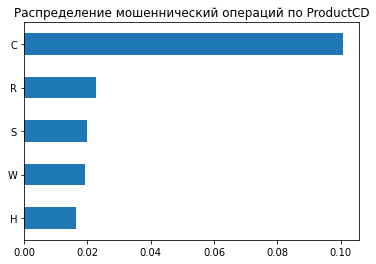

In [69]:
ProductCD_0 = (train[train["isFraud"]==0]["ProductCD"].value_counts()/train["ProductCD"].value_counts()).sort_values()
ProductCD_1 = train[train["isFraud"]==1]["ProductCD"].value_counts()/train["ProductCD"].value_counts()
ProductCD_1 = ProductCD_1.sort_values()
ProductCD_1.plot(kind="barh", title="Распределение мошеннический операций по ProductCD")
plt.show()

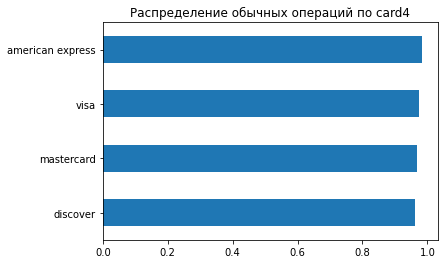

In [70]:
card4_0 = train[train["isFraud"]==0]["card4"].value_counts()/train["card4"].value_counts()
card4_0 = card4_0.sort_values()
card4_0.plot(kind="barh", title="Распределение обычных операций по card4")
plt.show()

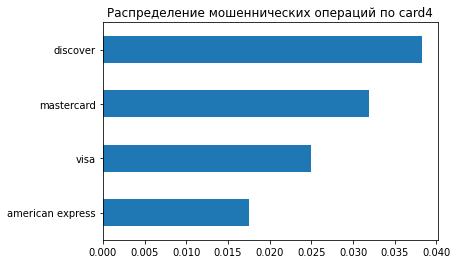

In [71]:
card4_1 = train[train["isFraud"]==1]["card4"].value_counts()/train["card4"].value_counts()
card4_1 = card4_1.sort_values()
card4_1.plot(kind="barh", title="Распределение мошеннических операций по card4")
plt.show()

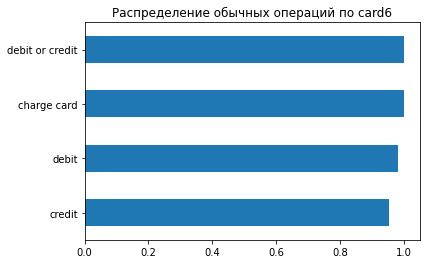

In [72]:
card6_0 = train[train["isFraud"]==0]["card6"].value_counts()/train["card6"].value_counts()
card6_0 = card6_0.sort_values()
card6_0.plot(kind="barh", title="Распределение обычных операций по card6")
plt.show()

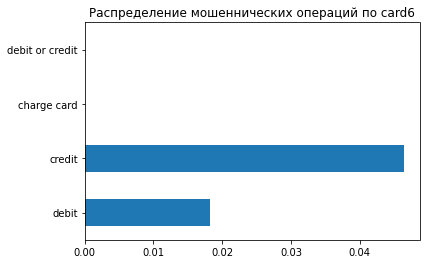

In [73]:
card6_1 = train[train["isFraud"]==1]["card6"].value_counts()/train["card6"].value_counts()
card6_1 = card6_1.sort_values()
card6_1.plot(kind="barh", title="Распределение мошеннических операций по card6")
plt.show()

Выводы: большая доля мошеннических операций приходится на категорию C по картам типа discover, а первом месте кредитовые, а на втором месте дебетовые.

## Основное задание:
Даны выборки для обучения и для тестирования. Задание заключается в том, чтобы попробовать разные способы валидации, проанализировать плюсы / минусы каждой и сделать выводы о том, какой способ валидации наиболее устойчивый в данной задаче. Метрика качества для оценки прогнозов - ROC-AUC, название целевой переменной - IsFraud. Рекомендуется использовать модели градиетного бустинга, реализация любая.

### Задание 1: сделать Hold-Out валидацию с разбиением, размер которого будет адеквтаным, по вашему мнению; разбиение проводить по id-транзакции (TransactionID), обучать модель градиетного бустинга любой реализации с подбором числа деревьев по early_stopping критерию до достижения сходимости. Оценить качество модели на тестовой выборке, оценить расхождение по сравнению с качеством на обучающей выборке и тестовой выборке.

In [94]:
x_train, x_test = train_test_split(
    train.drop(["isFraud"], axis=1), train_size=0.75, shuffle=True, random_state=1,
)
y_train, y_test = train_test_split(
    train["isFraud"], train_size=0.75, shuffle=True, random_state=1,
)

In [95]:
numerical_features = x_train.select_dtypes(exclude=["object"])
numerical_features = numerical_features.columns.tolist()

x_train = x_train[numerical_features]
x_test = x_test[numerical_features]

print("x_train.shape = {} rows, {} cols".format(*x_train.shape))
print("x_test.shape = {} rows, {} cols".format(*x_test.shape))

x_train.shape = 37500 rows, 379 cols
x_test.shape = 12501 rows, 379 cols


In [103]:
model = xgb.XGBClassifier(random_state=1)
model.fit(x_train, y_train, early_stopping_rounds=50, eval_metric="auc", eval_set=[(x_train, y_train), (x_test, y_test)])

[0]	validation_0-auc:0.76281	validation_1-auc:0.75206
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.81701	validation_1-auc:0.79861
[2]	validation_0-auc:0.82739	validation_1-auc:0.81206
[3]	validation_0-auc:0.83972	validation_1-auc:0.82192
[4]	validation_0-auc:0.84605	validation_1-auc:0.83012
[5]	validation_0-auc:0.85159	validation_1-auc:0.83576
[6]	validation_0-auc:0.87360	validation_1-auc:0.85674
[7]	validation_0-auc:0.88143	validation_1-auc:0.86315
[8]	validation_0-auc:0.89755	validation_1-auc:0.87355
[9]	validation_0-auc:0.90210	validation_1-auc:0.87541
[10]	validation_0-auc:0.91192	validation_1-auc:0.88724
[11]	validation_0-auc:0.91480	validation_1-auc:0.88739
[12]	validation_0-auc:0.92478	validation_1-auc:0.89276
[13]	validation_0-auc:0.92959	validation_1-auc:0.89326
[14]	validation_0-auc:0.93845	validation_1-auc:0.89972
[15]	validation_0-auc:0.9443

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [105]:
train_score = roc_auc_score(y_train, model.predict(x_train, ntree_limit=model.best_ntree_limit))
test_score = roc_auc_score(y_test, model.predict(x_test, ntree_limit=model.best_ntree_limit))

print(f"Train-score: {round(train_score, 3)}, Test-score: {round(test_score, 3)}")

Train-score: 0.896, Test-score: 0.725


Выводы: было бы лучше, если бы качество на трейне было чуть ближе к качеству на тесте. Сейчас разница почти в 0.2 (0.9-0.7)